## Notes on the Ammonia model ##

Exact equation from the [source code](https://github.com/pyspeckit/pyspeckit/blob/master/pyspeckit/spectrum/models/ammonia.py#L210):

            population_upperstate = lin_ntot * orthoparafrac * partition/(Z.sum())

            tau_dict[linename] = (population_upperstate /
                                  (1. + np.exp(-h*frq/(kb*tkin) ))*ccms**2 /
                                  (8*np.pi*frq**2) * aval *
                                  (1-np.exp(-h*frq/(kb*tex))) /
                                  (width/ckms*frq*np.sqrt(2*np.pi)) )


\begin{equation}
    \tau = N_{tot} g_{opr} Z_{upper} \frac{A_{ij} c^2}{8\pi\nu^2} 
    \left(1-\exp{ \frac{-h \nu}{k_B T_{ex}} } \right)
    \left(1+\exp{\frac{-h \nu}{k_B T_K}}\right)
    \left((2\pi)^{1/2} \nu \sigma_\nu / c\right)^{-1}
\end{equation}

Equation 16 from Rosolowsky et al 2008:

$$N(1,1) = \frac{8 \pi k \nu_0^2}{h c^3} \frac{1}{A_{1,1}} \sqrt{2\pi}\sigma_\nu (T_{ex}-T_{bg})\tau$$

Rearranges to:

$$\tau = N(1,1) \frac{h c^3}{8\pi k \nu_0^2} A_{1,1} \frac{1}{\sqrt{2 \pi} \sigma_\nu} \left(T_{ex}-T_{bg})\right)^{-1}$$

Equation A4 of Friesen et al 2009:

$$N(1,1) = \frac{8\pi\nu^2}{c^2} \frac{g_1}{g_2} \frac{1}{A_{1,1}} \frac{1+\exp\left(-h\nu_0/k_B T_{ex}\right)}{1-\exp\left(-h \nu_0/k_B T_{ex}\right)} \int \tau(\nu) d\nu$$

Equation 98 of Mangum & Shirley 2015:


$$N_{tot} = \frac{3 h}{8 \pi \mu^2 R_i} \frac{J_u(J_u+1)}{K^2} 
\frac{Q_{rot}}{g_J g_K g_I} \frac{\exp{E_u/k_B T_{ex}}}{\exp{h \nu/k_B T_{ex}} - 1} 
\left[\frac{\int T_R dv}{f\left(J_\nu(T_{ex})-J_\nu{T_B}\right) }\right]$$

## From Scratch ##

$$\tau_\nu = \int \alpha_\nu ds$$
$$\alpha_\nu = \frac{c^2}{8\pi\nu_0^2} \frac{g_u}{g_l} n_l A_{ul} \left(1-\frac{g_l n_u}{g_u n_l}\right) \phi_\nu$$

Excitation temperature:
$$T_{ex} \equiv \frac{h\nu_0/k_b}{\ln \frac{n_l g_u}{n_u g_l} } $$

$\nu_0$ = rest frequency of the line

Rearranges to:
$$ \frac{n_l g_u}{n_u g_l} = \exp\left(\frac{h \nu_0}{k_B T_{ex}}\right)$$

Boltzman  distribution:
$$ \frac{n_u}{n_l} = \frac{g_u}{g_l} \exp\left(\frac{-h \nu_0}{k_B T}\right)$$
where T is a thermal equilibrium temperature

Rearranges to:
$$ 1-\frac{n_u g_l}{n_l g_u} = 1-\exp\left(\frac{-h \nu_0}{k_B T}\right)$$


Column Density 
$$N_u \equiv \int n_u ds$$
$$N_l \equiv \int n_l ds$$

Starting to substitute previous equations into each other:

$$\tau_\nu d\nu= \alpha_\nu d\nu = \frac{c^2}{8\pi\nu_0^2} \frac{g_u}{g_l} n_l A_{ul} \left(1-\frac{g_l n_u}{g_u n_l}\right) \phi_\nu d\nu$$

$$\frac{g_u}{g_l}N_l = N_u\exp\left(\frac{h \nu_0}{k_B T_{ex}}\right)$$

First substitution is the Boltzmann distribution, with $T_{ex}$ for T
$$\int \tau_\nu d\nu = \int \frac{c^2}{8\pi\nu_0^2} \frac{g_u}{g_l} n_l A_{ul} \left[  1-\exp\left(\frac{-h \nu_0}{k_B T_{ex}}\right) \right] \phi_\nu d\nu $$

Second is the $N_l$ - $N_u$ relation:
$$\int \tau_\nu d\nu = \frac{c^2}{8\pi\nu_0^2}  A_{ul} N_u\left[\exp\left(\frac{h \nu_0}{k_B T_{ex}}\right)\right] \left[  1-\exp\left(\frac{-h \nu_0}{k_B T}\right) \right] \int \phi_\nu d\nu $$

Then some simplification:
$$\int \tau_\nu d\nu = \frac{c^2}{8\pi\nu_0^2}  A_{ul} N_u \left[  \exp\left(\frac{h \nu_0}{k_B T}\right) - 1 \right] \int \phi_\nu d\nu $$

$$A_{ul} = \frac{64\pi^4\nu_0^3}{3 h c^3} \left|\mu_{lu}\right|^2$$

Becomes, via some manipulation, equation 29 of Mangum & Shirley 2015:
$$N_u = \frac{3 h c}{8\pi^3 \nu \left|\mu_{lu}\right|^2} \left[\exp\left(\frac{h\nu}{k_B T_{ex}}\right) -1\right]^{-1} \int \tau_\nu d\nu$$
where I have used $T_{ex}$ instead of $T$ here because that is one of the substitutions invoked (quietly) in their derivation.  There is some sleight-of-hand regarding assuming $N_l = n_l$ that essentially assumes $T_{ex}$ is constant along the line of sight, but that is fine.

(Equation 30 is the same as this one, but with $dv$ instead of $d\nu$ units)

Solve for tau again (because that's what's implemented in the code):

$$\mathrm{"tau"} = \int \tau_\nu d\nu = N_u \frac{
c^2 A_{ul}}{8\pi\nu_0^2} \left[\exp\left(\frac{h\nu}{k_B T_{ex}}\right) -1\right] $$

The key difference from Erik's derivation is that this is $N_u$, but he has defined $N_{(1,1)}= N_u + N_l$.

So, we get $N_l$ the same way as above:
$$N_l = \frac{8\pi\nu_0^2}{c^2} \frac{g_l}{g_u} A_{ul}^{-1} \left[  1-\exp\left(\frac{-h \nu_0}{k_B T_{ex}}\right) \right]^{-1} \int \tau d\nu$$

$$N_l = \frac{3 h c}{8 \pi^3 \nu \left|\mu_{lu}\right|^2} \frac{g_l}{g_u}  \left[  1-\exp\left(\frac{-h \nu_0}{k_B T_{ex}}\right) \right]^{-1} \int \tau d\nu$$

Added together:
$$N_u + N_l = \frac{3 h c}{8 \pi^3 \nu \left|\mu_{lu}\right|^2} \frac{\frac{g_l}{g_u}  +\exp\left(\frac{-h \nu_0}{k_B T_{ex}}\right)}{1-\exp\left(\frac{-h \nu_0}{k_B T_{ex}}\right)} \int \tau d\nu$$

We can solve that back for tau, which is what Erik has done:

$$\int \tau d\nu = (N_u + N_l) \frac{8 \pi^3 \nu \left|\mu_{lu}\right|^2}{3 h c} \frac{1-\exp\left(\frac{-h \nu_0}{k_B T_{ex}}\right)} {\frac{g_l}{g_u}  +\exp\left(\frac{-h \nu_0}{k_B T_{ex}}\right)} $$

$$=(N_u + N_l) \frac{g_u}{g_l}\frac{8 \pi^3 \nu \left|\mu_{lu}\right|^2}{3 h c} \frac{1-\exp\left(\frac{-h \nu_0}{k_B T_{ex}}\right)} {1  +\frac{g_u}{g_l}\exp\left(\frac{-h \nu_0}{k_B T_{ex}}\right)} $$

$$=(N_u + N_l) \frac{g_u}{g_l}\frac{A_{ul}c^2}{8\pi\nu_0^2} \frac{1-\exp\left(\frac{-h \nu_0}{k_B T_{ex}}\right)} {1  +\frac{g_u}{g_l}\exp\left(\frac{-h \nu_0}{k_B T_{ex}}\right)} $$

now identical to Erik's equation.

This is actually a problem, because $N_u$ is related to $N_{tot}$ via the partition function, but there is some double-counting going on if we try to relate $N_{(1,1)}$ to $N_{tot}$ with the same equation.

So, to reformulate the equations in pyspeckit using the appropriate values, we want to use both the partition function (calculated using $T_{kin}$) and $N_u$.

Eqn 31:
    

$$N_u = N_{tot} \frac{g_u}{Q_{rot}} \exp\left(\frac{-E_u}{k_B T_{kin}}\right)$$

is implemented correctly in pyspeckit:

    population_upperstate = lin_ntot * orthoparafrac * partition/(Z.sum())

where ``partition`` is 

$$Z_i(\mathrm{para}) = (2J + 1) \exp\left[ \frac{ -h (B_0 J (J+1) + (C_0-B_0)J^2)}{k_B T_{kin}}\right]$$

$$Z_i(\mathrm{ortho}) = 2(2J + 1) \exp\left[ \frac{ -h (B_0 J (J+1) + (C_0-B_0)J^2)}{k_B T_{kin}}\right]$$


...so I'm assuming (haven't checked) that $E_u = h (B_0 J (J+1) + (C_0-B_0)J^2)$

Note that the leading "2" above cancels out in the Z/sum(Z), so it doesn't matter if it's right or not.  I suspect, though, that the 2 belongs in front of both the para and ortho states, but it should be excluded for the J=0 case.

(Erik's diff here)

EWR: The above equation is problematic because it relates the total column density to the $(J,J)$ state which is the equivalent of the $N_{(1,1)}$ term.  In the notation above $N_{(1,1)} = N_u + N_l$, so to get this right, you need to consider the inversion transition splitting on top of the total energy of the state so that 
$$ E_u = h (B_0 J (J+1) + (C_0-B_0)J^2) + \Delta E_{\mathrm{inv}}, g_u = 1 $$ 
and 
$$ E_l = h (B_0 J (J+1) + (C_0-B_0)J^2) - \Delta E_{\mathrm{inv}}, g_l = 1 $$ 
or, since the splitting is small compared to the rotational energy (1 K compared to > 20 K), then

$$Z_J \approx 2 (2J + 1) \exp\left[ \frac{ -h (B_0 J (J+1) + (C_0-B_0)J^2)}{k_B T_{\mathrm{rot}}}\right]$$

where the leading 2 accounts for the internal inversion states.  Since this 2 appears in all the terms, it cancels out in the sum.  Note that I have also changed the $T_{\mathrm{kin}}$ to $T_{\mathrm{rot}}$ since these two aren't the same and it is the latter which establishes the level populations.

Returning to the above, I would then suggest 

$$N_{(J,J)} = N_{tot} \frac{Z_J}{\sum_j Z_j} $$

Some numerical checks: How bad was the use of Tkin instead of Tex in the $\tau$ equation?

$$(N_u + N_l) \frac{g_u}{g_l}\frac{A_{ul}c^2}{8\pi\nu_0^2} \frac{1-\exp\left(\frac{-h \nu_0}{k_B T_{ex}}\right)} {1  +\frac{g_u}{g_l}\exp\left(\frac{-h \nu_0}{k_B T_{ex}}\right)} $$

In [1]:
from astropy import units as u
from astropy import constants
freq = 23*u.GHz
def tau_wrong(tkin, tex):
    return (1-np.exp(-constants.h * freq/(constants.k_B*tkin)))/(1+np.exp(-constants.h * freq/(constants.k_B*tex)))
def tau_right(tex):
    return (1-np.exp(-constants.h * freq/(constants.k_B*tex)))/(1+np.exp(-constants.h * freq/(constants.k_B*tex)))

In [2]:
tkin = np.linspace(5,40,101)*u.K
tex = np.linspace(5,40,100)*u.K

In [3]:
grid = np.array([[tau_wrong(tk,tx)/tau_right(tx) for tx in tex] for tk in tkin])

In [4]:
%matplotlib inline
import pylab as pl

<matplotlib.contour.QuadContourSet instance at 0x107134c20>

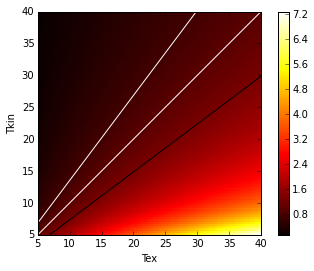

In [5]:
pl.imshow(grid, cmap='hot', extent=[5,40,5,40])
pl.xlabel("Tex")
pl.ylabel("Tkin")
pl.colorbar()
pl.contour(tex, tkin, grid, levels=[0.75,1,1/0.75], colors=['w','w','k'])

So the error could be 50%-700% over a somewhat reasonable range.  That's bad, and it affects the temperature estimates.  However, the effect on temperature estimates should be pretty small, since each line will be affected in the same way.  The biggest effect will be on the column density.

But, is this error at all balanced by the double-counting problem?

Because we were using the partition function directly, it's not obvious.  I was assuming that we were using the equation with $N_u$ as the leader, but we were using $N_u+N_l$.  i.e., I was using this equation:

$$\int \tau d\nu =(N_u + N_l) \frac{g_u}{g_l}\frac{A_{ul}c^2}{8\pi\nu_0^2} \frac{1-\exp\left(\frac{-h \nu_0}{k_B T_{ex}}\right)} {1  +\frac{g_u}{g_l}\exp\left(\frac{-h \nu_0}{k_B T_{ex}}\right)} $$

but with $N_u$ in place of $N_u + N_l$.

The magnitude of the error can therefore be estimated by computing $(N_u+N_l)/N_u = 1 + \frac{N_l}{N_u}$.

We can use the Boltzmann distribution to compute this error, then:
$$ \frac{n_u}{n_l} = \frac{g_u}{g_l}\exp\left(\frac{-h \nu_0}{k_B T}\right)$$


In [6]:
def nunlnu_error(Tkin):
    return 1+np.exp(-constants.h * freq / (constants.k_B * Tkin))

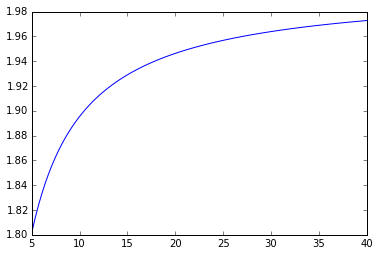

In [7]:
pl.plot(tkin.value, nunlnu_error(tkin))

So we were always off by a factor very close to 2.  The *relative* values of $\tau$ should never have been affected by this issue.

It will be more work to determine exactly how much the T_K and column estimates were affected.

# New work in May 2016: T_{rot} #

Comparing Trot and Tkin.  If we start with the equation that governs level populations,

$$N_u = N_{tot} \frac{g_u}{Q_{rot}} \exp\left(\frac{-E_u}{k_B T_{kin}}\right)$$

we get 

$$N_u / N_l = \frac{g_u}{g_l} \exp\left(\frac{-E_u}{k_B T_{kin}} + \frac{E_l}{k_B T_{kin}}\right)$$

where we really mean $T_{rot}$ instead of $T_{kin}$ here as long as we're talking about just two levels.  This gives us a definition

$$T_{rot} = \left(\frac{E_l-E_u}{k_B}\right)\left[\ln\left(\frac{N_u g_l}{N_l g_u}\right)\right]^{-1}$$

which is the rotational temperature for a two-level system... which is just a $T_{ex}$, but governing non-radiatively-coupled levels.

So, for example, if we want to know $T_{rot}$ for the 2-2 and 1-1 lines at $n=10^4$ and $T_{kin}=20$ K:

In [8]:
from pyradex import Radex
from astropy import constants, units as u
R = Radex(species='p-nh3', column=1e13, collider_densities={'pH2':1e4}, temperature=20)
tbl = R(collider_densities={'ph2': 1e4}, temperature=20, column=1e13)

/Users/adam/repos/pyradex/pyradex/core.py:852: RuntimeWarning: invalid value encountered in divide
  frac_level_diff = level_diff/self.level_population


In [9]:
tbl[8:10]

Tex,tau,frequency,upperstateenergy,upperlevel,lowerlevel,upperlevelpop,lowerlevelpop,brightness,T_B
K,,GHz,K,,,,,erg / (cm2 Hz s sr),K
float64,float64,float64,float64,str6,str6,float64,float64,float64,float64
6.78936052483,0.0929414309528,23.6944955,1.14,01_01_,01_01_,0.393279209876,0.464987835394,6.17629302965e-17,0.358064405386
6.53340348878,0.0212672724409,23.7226333,42.32,02_02_,02_02_,0.064641582585,0.0769470693495,1.37491511187e-17,0.0795203502905


In [10]:
# we're comparing the upper states since these are the ones that are emitting photons
trot = (u.Quantity(tbl['upperstateenergy'][8]-tbl['upperstateenergy'][9], u.K) *
        np.log((tbl['upperlevelpop'][9] * R.statistical_weight[8]) /
               (tbl['upperlevelpop'][8] * R.statistical_weight[9]))**-1
        )

In [11]:
trot

<Quantity 22.806041117736964 K>

In [12]:
tbl['Tex'][8:10].mean()

6.6613820068044447

## Pause here ##

$T_{rot} = 60$ K for $T_{kin}=25$ K?  That doesn't seem right.  Is it possible RADEX is doing something funny with level populations?

# ERIK I SOLVED IT #
I had left out the $^{-1}$ in the code.  Oops!

In [13]:
dT_oneone = -(constants.h * u.Quantity(tbl['frequency'][8], u.GHz)/constants.k_B).to(u.K)
print("delta-T for 1-1_upper - 1-1_lower: {0}".format(dT_oneone))
tex = (dT_oneone *
        np.log((tbl['upperlevelpop'][8] * R.statistical_weight[8]) /
               (tbl['lowerlevelpop'][8] * R.statistical_weight[8]))**-1
        )
print("Excitation temperature computed is {0} and should be {1}".format(tex.to(u.K), tbl['Tex'][8]))

delta-T for 1-1_upper - 1-1_lower: -1.13715649924 K
Excitation temperature computed is 6.78934149821 K and should be 6.78936052483


## Moving on: comparison to Swift et al 2005 ##

Swift et al 2005 eqn A6

$$T_R = T_K \left[ 1 + \frac{T_K}{T_0} \ln \left[1+0.6\exp\left( -15.7/T_K \right)\right] \right]^{-1}$$

where $T_0=-41.18$ K

In [14]:
T0=tbl['upperstateenergy'][8]-tbl['upperstateenergy'][9]
T0

-41.18

In [15]:
def tr_swift(tk):
    return tk*(1+tk/T0 * np.log(1+0.6*np.exp(-15.7/tk)))**-1

In [16]:
tr_swift(20)

22.662533151044173

In [17]:
def trot_radex(column=1e13, density=1e4, tkin=20):
    tbl = R(collider_densities={'ph2': density}, temperature=tkin, column=column)
    trot = (u.Quantity(tbl['upperstateenergy'][8]-tbl['upperstateenergy'][9], u.K) *
        np.log((tbl['upperlevelpop'][9] * R.statistical_weight[8]) /
               (tbl['upperlevelpop'][8] * R.statistical_weight[9]))**-1
        )
    return trot

In [18]:
def tex_radex(column=1e13, density=1e4, tkin=20, lineno=8):
    """ used in tests below """
    tbl = R(collider_densities={'ph2': density}, temperature=tkin, column=column)
    return tbl[lineno]['Tex']

In [19]:
%matplotlib inline
import pylab as pl

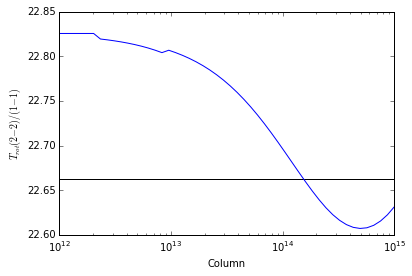

In [20]:
cols = np.logspace(12,15)
trots = [trot_radex(column=c).to(u.K).value for c in cols]
pl.semilogx(cols, trots)
pl.hlines(tr_swift(20), cols.min(), cols.max(), color='k')
pl.xlabel("Column")
pl.ylabel("$T_{rot} (2-2)/(1-1)$")

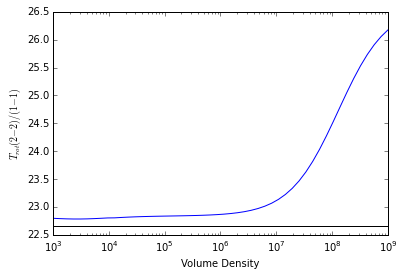

In [21]:
densities = np.logspace(3,9)
trots = [trot_radex(density=n).to(u.K).value for n in densities]
pl.semilogx(densities, trots)
pl.hlines(tr_swift(20), densities.min(), densities.max(), color='k')
pl.xlabel("Volume Density")
pl.ylabel("$T_{rot} (2-2)/(1-1)$")

/Users/adam/repos/pyradex/pyradex/core.py:933: RuntimeWarning: overflow encountered in exp
  bnutex = thc*xt/(np.exp(earg)-1.0)


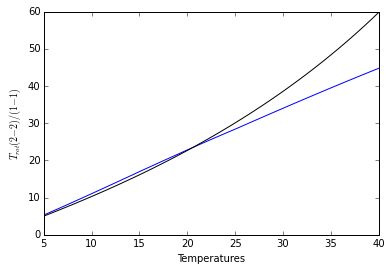

In [22]:
temperatures = np.linspace(5,40)
trots = [trot_radex(tkin=t).to(u.K).value for t in temperatures]
pl.plot(temperatures, trots)
pl.plot(temperatures, tr_swift(temperatures), color='k')
pl.xlabel("Temperatures")
pl.ylabel("$T_{rot} (2-2)/(1-1)$")

## Tests of cold_ammonia reproducing pyspeckit ammonia spectra ##

In [23]:
from pyspeckit.spectrum.models.tests import test_ammonia
from pyspeckit.spectrum.models import ammonia

### Test 1: Use a constant excitatino temperature for all lines

In [24]:
tkin = 20*u.K
trot = trot_radex(tkin=tkin)
print(trot)

22.8060411177 K


In [25]:
spc = test_ammonia.make_synthspec(lte=False, tkin=None, tex=6.66, trot=trot.value)
spc.specfit.Registry.add_fitter('cold_ammonia',ammonia.cold_ammonia_model(),6)
spc.specfit(fittype='cold_ammonia', guesses=[23, 5, 13.1, 1, 0.5, 0],
            fixed=[False,False,False,False,False,True])

print("For Tkin={1} -> Trot={2}, pyspeckit's cold_ammonia fitter got:\n{0}".format(spc.specfit.parinfo, tkin, trot))

INFO:astropy:Creating spectra
INFO:astropy:Concatenating data
INFO:astropy:Left region selection unchanged.  xminpix, xmaxpix: 0,753


INFO: Creating spectra [pyspeckit.spectrum.classes]
INFO: Concatenating data [pyspeckit.spectrum.classes]
INFO: Left region selection unchanged.  xminpix, xmaxpix: 0,753 [pyspeckit.spectrum.interactive]
For Tkin=20.0 K -> Trot=22.8060411177 K, pyspeckit's cold_ammonia fitter got:
Param #0        tkin0 =      27.1289 +/-         140.907   Range:[2.7315,inf)
Param #1         tex0 =      6.66001 +/-         2721.65   Range:[2.7315,inf)
Param #2        ntot0 =           13 +/-         128.116   Range:    [5,25]
Param #3       width0 =          0.5 +/-         2.66707   Range:   [0,inf)
Param #4      xoff_v0 =  3.31721e-05 +/-               0 
Param #5      fortho0 =            0 (fixed)  Range:     [0,1]


Config parameter 'enabled_record_valued_keyword_cards' in section [io.fits] of the file '/Users/adam/.astropy/config/astropy.cfg' is deprecated. Use 'enable_record_valued_keyword_cards' in section [io.fits] instead.


In [26]:
spc.specfit(fittype='cold_ammonia', guesses=[22.80, 6.6, 13.1, 1, 0.5, 0],
            fixed=[False,False,False,False,False,True])
bestfit_coldammonia_temperature = spc.specfit.parinfo[0]
print("The best fit cold ammonia temperature is {0} for an input T_rot={1}".format(bestfit_coldammonia_temperature, trot))

INFO:astropy:Left region selection unchanged.  xminpix, xmaxpix: 0,753


INFO: Left region selection unchanged.  xminpix, xmaxpix: 0,753 [pyspeckit.spectrum.interactive]
The best fit cold ammonia temperature is Param #0        tkin0 =      27.1289 +/-     8.17087e-05   Range:[2.7315,inf) for an input T_rot=22.8060411177 K


### Test 2: Use a different (& appropriate) tex for each level in the input model spectrum

In [27]:
tex11 = tex_radex(tkin=tkin, lineno=8)
tex22 = tex_radex(tkin=tkin, lineno=9)
print("tex11={0}, tex22={1} for tkin={2}".format(tex11,tex22,tkin))

tex11=6.78936052483, tex22=6.53340348878 for tkin=20.0 K


In [28]:
spc = test_ammonia.make_synthspec(lte=False, tkin=None, tex={'oneone':tex11, 'twotwo':tex22}, trot=trot.value,
                                  lines=['oneone','twotwo'])
spc.specfit.Registry.add_fitter('cold_ammonia',ammonia.cold_ammonia_model(),6)
spc.specfit(fittype='cold_ammonia', guesses=[23, 5, 13.1, 1, 0.5, 0],
            fixed=[False,False,False,False,False,True])

print("For Tkin={1} -> Trot={2}, pyspeckit's cold_ammonia fitter got:\n{0}".format(spc.specfit.parinfo, tkin, trot))

TypeError: unsupported operand type(s) for /: 'float' and 'dict'

## RADEX analysis: T_rot vs T_kin vs T_ex ##

In [ ]:
temperatures = np.linspace(5,40)
trots = [trot_radex(tkin=t).to(u.K).value for t in temperatures]
tex11s = np.array([tex_radex(tkin=t, lineno=8) for t in temperatures])
tex22s = np.array([tex_radex(tkin=t, lineno=9) for t in temperatures])
pl.plot(trots, tex11s)
pl.plot(trots, tex22s)
#pl.plot(tr_swift(temperatures), color='k')
pl.ylabel("$T_{ex}$")
pl.xlabel("$T_{rot} (2-2)/(1-1)$")

In [ ]:
temperatures = np.linspace(5,40)
trots = [trot_radex(tkin=t).to(u.K).value for t in temperatures]
tex11s = np.array([tex_radex(tkin=t, lineno=8) for t in temperatures])
tex22s = np.array([tex_radex(tkin=t, lineno=9) for t in temperatures])
pl.plot(trots, tex11s/tex22s)
#pl.plot(tr_swift(temperatures), color='k')
pl.ylabel("$T_{ex} (2-2)/(1-1)$")
pl.xlabel("$T_{rot} (2-2)/(1-1)$")